# Proste wnioskowanie statystyczne: przykład zastosowania współczynnika korelacji Pearsona

Współczynnik Pearsona używany jest do sprawdzenia korelacji między dwiema zmiennymi ciągłymi.

źródło danych: https://www.kaggle.com/saurabh00007/diabetescsv

In [1]:
import pandas as pd
df = pd.read_csv('c:/1/diabetes.csv')
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


Celem badania jest sprawdzenie czy (H1) istnieje statystycznie istotna dodatnia korelacja pomiędzy ciśnienie krwi a masą ciała pacjentek.
-	H0 - nie istnieje istotnie statystyczny związek pomiędzy masą ciała a ciśnieniem krwi
-	H1 - istnieje istotnie statystyczny związek pomiędzy masą ciała a ciśnieniem krwi

### <span style="color:blue">Sprawdzenie kompletności danych</span>

Zauważono, że część informacji takich jak ciśnienie krwi czy temperatura ciała wynosi zero. Traktuje to jako brak danych.

In [2]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Dane są kompletne lecz występują braki w danych w postaci zer. Zamieniam te zera na braki.

In [3]:
import numpy as np

df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']] = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']].replace(0,np.NaN)

In [4]:
print('Number of rows and columns: ',df.shape)
df.isnull().sum()

Number of rows and columns:  (768, 9)


Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Usuwam rekordy z brakującymi danymi. 

In [5]:
df = df.dropna(how ='any')

In [6]:
print('Number of rows and columns: ',df.shape)
df.isnull().sum()

Number of rows and columns:  (336, 9)


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Teraz danych jest znacznie mniej ale są lepszej jakości.

### <span style="color:blue">Pearson correlation coefficient</span>
The Pearson correlation coefficient [1] measures the linear relationship between two datasets. The calculation of the p-value relies on the assumption that each dataset is normally distributed. (See Kowalski [3] for a discussion of the effects of non-normality of the input on the distribution of the correlation coefficient.) Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation.

Pearson correlation coefficient zwraca podwójną krotkę składającą się ze współczynnika korelacji i odpowiedniej wartości p:
Współczynnik korelacji może wynosić od -1 do +1.
Hipotezą zerową jest to, że dwie zmienne są nieskorelowane. Wartość p jest liczbą od zera do jednej, która reprezentuje prawdopodobieństwo, że twoje dane powstałyby, gdyby hipoteza zerowa była prawdziwa.

### p- value
Niska wartość p (taka jak 0,01) jest uważana za dowód, że hipoteza zerowa może być „Odrzucone”. Statystycy twierdzą, że wartość p wynosząca 0,01 jest „bardzo znacząca” lub twierdzą, że „dane są znaczące na poziomie 0,01 ”
Kompetentny badacz badający hipotetyczny związek ustali wartość p przed badaniem empirycznym. Zazwyczaj stosuje się wartości 0,01 lub 0,05. Gdyby dane z badania dają wartość p mniejszą niż wartość określona z góry, badacz twierdzi, że ich badanie jest znaczące i pozwala im odrzucić zerowa hipoteza i wyciągnięcie wniosku, że związek naprawdę istnieje.
W przypadku związku między spożyciem alkoholu a rakiem piersi współczynnik korelacji wynosi około 0,4, przy bardzo małej wartości p - prawie równej zero. To mówi nam, że związek jest statystycznie istotny (bo jest mniejszy od 0.05 lub 0.01)

### Założenie rozkładu normalnego
Pożądane jest aby korelowane zmienne miały rozkłady zbliżone do rozkładu normalnego. Jednak nie jest obligatoryjna. Współczynnik r-Pearsona możemy obliczyć również dla zmiennych ze złamanym założeniem o rozkładzie normalnym. Należy również zwrócić uwagę na przypadki odstające, mogące zaburzać uzyskany wynik korelacji. 

### <span style="color:blue">Wykres rozproszenia wykonany w celu wychwycenia wartości odstających</span>

In [7]:
import seaborn as sns

sns.jointplot(x='Insulin', y='BMI', data=df)

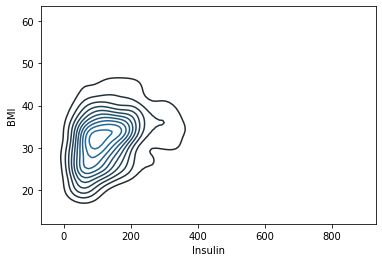

In [8]:
sns.kdeplot(df.Insulin, df.BMI)

### <span style="color:blue">Usuwanie wartości skrajnych w kolumnach 'Insulin' i 'BMI' </span>

In [9]:
df['Insulin'] = df['Insulin'].apply(lambda x: np.nan if x > 600 else x)
df['BMI'] = df['BMI'].apply(lambda x: np.nan if x > 50 else x)

df = df.dropna(how ='any')

Wykres rozproszenia po obcięciu wartości odstających.

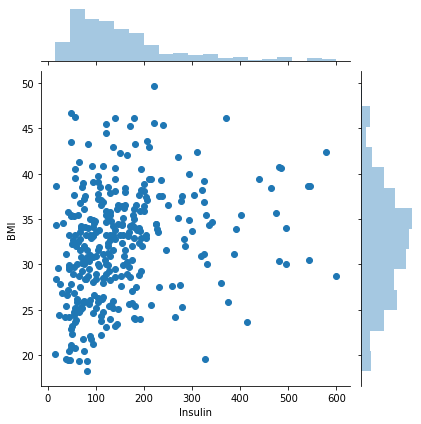

In [10]:
sns.jointplot(x='Insulin', y='BMI', data=df)

### <span style="color:blue">Pearson correlation coefficient</span>

In [11]:
df.dtypes

Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [12]:
import scipy

PKP = scipy.stats.pearsonr(df['Insulin'], df['BMI'])
PKP = np.round(PKP, decimals=5)
print(PKP)

[0.27494 0.     ]


Istnieje korelacja dodatnia pomiędzy poziomem insuliny we krwi pacjentek a współczynnikiem masy ciała BMI. Zostaje więc odrzucona hipoteza zerowa na rzecz hipotezy alternatywnej. Zjawisko korelacji jest istotne statystycznie ponieważ wartość p jest mniejsza od 0.01.

### <span style="color:blue">Wykres rozproszenia dla korelacji</span>

Text(0.5, 1.0, 'Scatterplot for blood insulin levels and BMI')

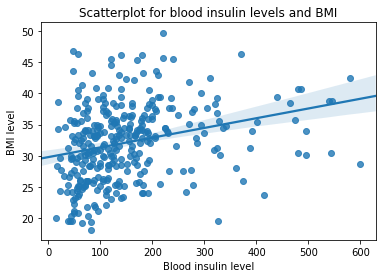

In [13]:
import matplotlib.pyplot as plt

scat2= sns.regplot(x='Insulin', y='BMI', data=df)
plt.xlabel('Blood insulin level')
plt.ylabel('BMI level')
plt.title('Scatterplot for blood insulin levels and BMI')

### <span style="color:blue">Prognozowanie na podstawie współczynnika korelacji Pearsona</span>

Znając poziom BMI możemy przewidzieć poziom insuliny we krwi i na odwrót. Poziom korelacji wynosi tutaj 0.275.
Krwadrat korelacji wynoszącej u nas 0.275 daje nam wartość r2 = 0.0756 .

Możemy więc przewidzieć 7,5 % zmienności, co oznacza, że 92% zmienności nie jest możliwa do przewidzenia na podstawie współczynnika korelacji Pearsona.
